In [1]:
import sys
from pathlib import Path
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from helper.system import Hamiltonian

In [2]:
# Test parameters
Ej = 30.19
Ec = 0.1
omega_c1 = 5.226
omega_c2 = 8.135
phi_ex = 0.2
bare_dim = [10, 1, 6]
trunc_dim = [5, 1, 4]

sc = Hamiltonian(phi_ex, Ej, Ec, bare_dim, trunc_dim, omega_c1, omega_c2)

In [6]:
# Function to calculate static rate for a given drive frequency
def calculate_static_rate(omegad, amplitude):
    der = sc.equasi_gradient(amplitude, omegad)[0]
    return np.abs(der)/2/np.pi

# A = 10e-3*2*np.pi
A = 5e-3 * 2 * np.pi
omega_ds = np.linspace(6.07, 6.23, 200) * 2 * np.pi

# Parallelize the calculations using joblib
static_rates = Parallel(n_jobs=-1)(delayed(calculate_static_rate)(omegad, A) for omegad in omega_ds)
static_rates = np.array(static_rates)

In [7]:
# Fourth-order analytical rates
def calculate_fourth_order_rate(omegad, amplitude):
    return np.abs(sc.fourth_order_der(amplitude, omegad)) / 2 / np.pi

fourth_order_rates = Parallel(n_jobs=-1)(delayed(calculate_fourth_order_rate)(omegad, A) for omegad in omega_ds)
fourth_order_rates = np.array(fourth_order_rates)

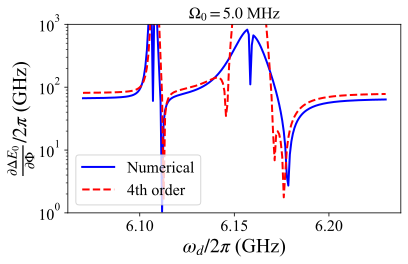

In [8]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 16,
    'mathtext.fontset': 'stix'
})

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(omega_ds / 2 / np.pi, static_rates * 1e3, label='Numerical', linewidth=2, color='blue', linestyle='-')
ax.plot(omega_ds / 2 / np.pi, fourth_order_rates * 1e3, label='4th order', linewidth=2, color='red', linestyle='--')
ax.set_xlabel(r'$\omega_d/2\pi$ (GHz)')
ax.set_ylabel(r'$\frac{\partial \Delta E_0}{\partial \Phi}/2\pi$ (GHz)')
ax.legend()
ax.tick_params(axis='both', labelsize=16)
ax.set_yscale('log')
ax.set_ylim(1e0, 1e3)
ax.set_title(r"$\Omega_0 = {:.1f}$ MHz".format(A * 1e3 / (2 * np.pi)))

plt.tight_layout()
plt.show()